In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
# Load the data
data = pd.read_csv(r'C:\Users\Jayshree Phukon\Desktop\last-main\copy\heart.csv')


In [3]:
# Data Cleaning step
data = data.dropna(axis=0)
# Transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)



In [4]:
# Creating Training and testing datasets
# X is the set of features that the model will learn from, and y is the target variable that the model will predict.
X = np.array(data.drop('target',axis=1))
y = np.array(data['target'])

In [5]:
# Normalizing the features by subtracting the mean and dividing with standard deviation
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [6]:
# Create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

# Define a new keras model for binary classification
def create_binary_model():
    # Create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [7]:
# Fit the binary model on the training data
history = binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)



Epoch 1/50


82/82 [==============================] - 2s 7ms/step - loss: 0.6730 - accuracy: 0.7134 - val_loss: 0.6354 - val_accuracy: 0.8049
Epoch 2/50
82/82 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 0.8073 - val_loss: 0.5190 - val_accuracy: 0.8537
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.8512 - val_loss: 0.4511 - val_accuracy: 0.8244
Epoch 4/50
82/82 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.8549 - val_loss: 0.4069 - val_accuracy: 0.8195
Epoch 5/50
82/82 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8500 - val_loss: 0.3798 - val_accuracy: 0.8293
Epoch 6/50
82/82 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8634 - val_loss: 0.3662 - val_accuracy: 0.8244
Epoch 7/50
82/82 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.8659 - val_loss: 0.3573 - val_accuracy: 0.8244
Epoch 8/50
82/82 [

In [8]:
# Predict the labels for the test data
y_pred = binary_model.predict(X_test)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Now compute the accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)

# Convert to percentage and round to two decimal places
test_accuracy_percent = round(test_accuracy * 100, 2)

print(f'Test Accuracy: {test_accuracy_percent}%')

# Print classification report
print(classification_report(y_test, y_pred_binary))

7/7 [==============================] - 0s 4ms/step
Test Accuracy: 92.2%
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       100
           1       0.90      0.95      0.93       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



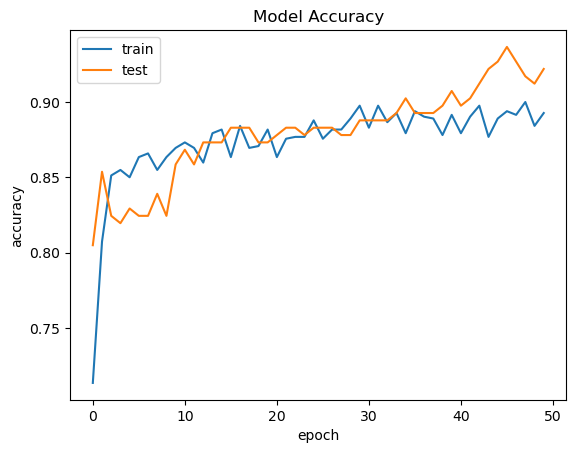

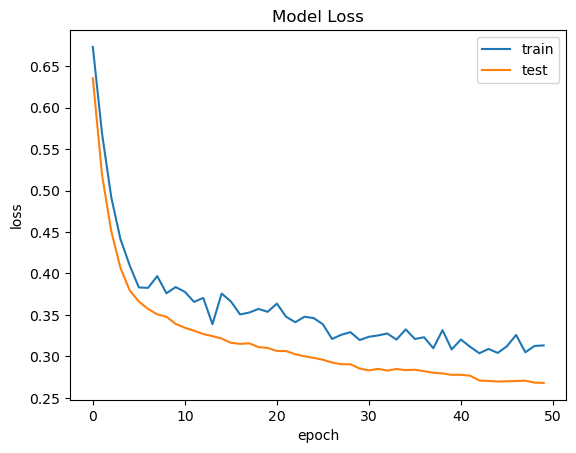

In [9]:
# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


7/7 [==============================] - 0s 4ms/step


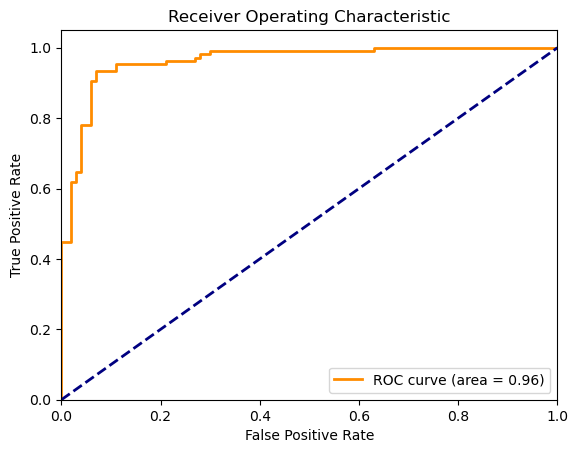

In [10]:
# Make predictions on the test data
y_pred = binary_model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Confusion Matrix:
[[70 30]
 [ 9 96]]


Test Accuracy (SVM): 81.46%
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



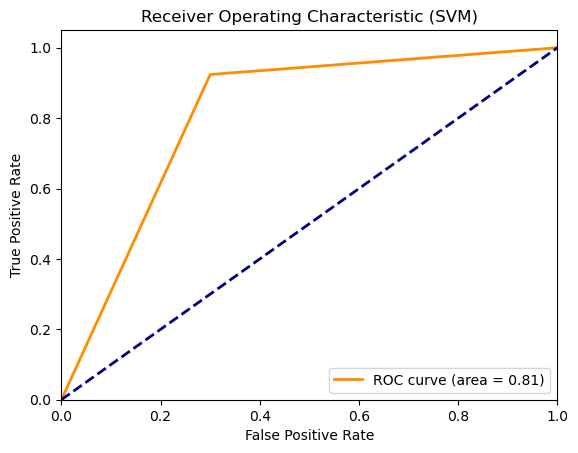

In [12]:
# Creating a SVM classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Trainning the model using the training sets
clf.fit(X_train, y_train)

# Predicting the response for test dataset
y_pred_svm = clf.predict(X_test)

# Now computing the accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Converting to percentage and round to two decimal places
test_accuracy_percent_svm = round(test_accuracy_svm * 100, 2)

print(f'Test Accuracy (SVM): {test_accuracy_percent_svm}%')

# Calculating Precision, Recall, F1 Score
print(classification_report(y_test, y_pred_svm))

# Computing ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot
plt.figure()
lw = 2
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

Test Accuracy (KNN): 94.63%
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.94      0.96      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



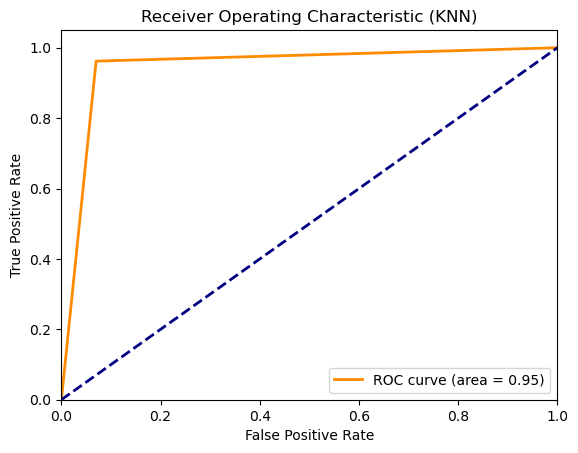

In [13]:
# Creating a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predicting the labels for the test data
y_pred_knn = knn.predict(X_test)

# Now computing the accuracy
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Converting to percentage and round to two decimal places
test_accuracy_percent_knn = round(test_accuracy_knn * 100, 2)

print(f'Test Accuracy (KNN): {test_accuracy_percent_knn}%')

# Calculating Precision, Recall, F1 Score
print(classification_report(y_test, y_pred_knn))

# Computing ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()

In [14]:
pickle.dump(knn, open('Heart_disease_knn.pkl','wb'))

In [15]:
model = pickle.load(open('Heart_disease_knn.pkl','rb'))

In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

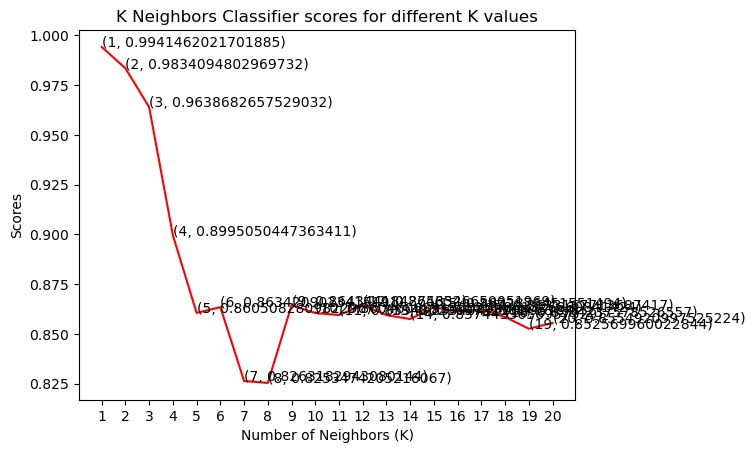

In [18]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [20]:
score.mean()

0.8643346659051969

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



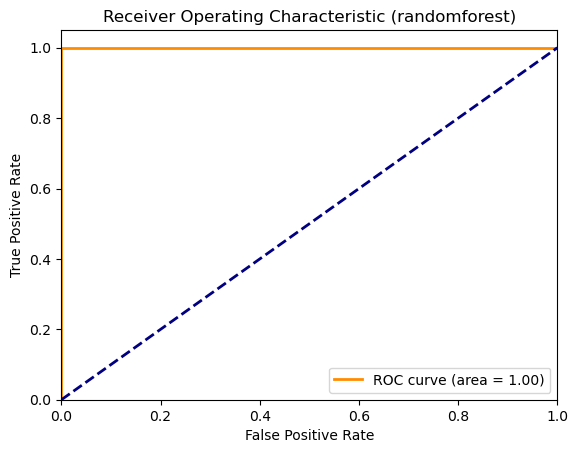

In [27]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# Step 2: Prepare your dataset
# Assume X contains your features and y contains your target variable
# Replace X and y with your actual feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Random Forest classifier
# You can customize the parameters based on your specific use case
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Train the model
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print additional metrics
print('Classification Report:\n', classification_report(y_test, y_pred))


# Assuming rf_classifier is your trained RandomForestClassifier
# and X_test is your test set

# Make predictions
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_rf_classifier, tpr_rf_classifier, _ = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
roc_auc_rf_classifier = roc_auc_score(y_test, y_pred_proba)

# Now you can plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_rf_classifier, tpr_rf_classifier, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_rf_classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (randomforest)')
plt.legend(loc="lower right")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.9951170759565962